# Various Loss Functions


### Definition:

* **The loss function is determined as the difference between the actual output and the predicted output from the 
model for the single training example while the average of the loss function for all the training example is termed as the cost function. This computed difference from the loss functions( such as Regression Loss, Binary Classification and Multiclass Classification loss function) is termed as the error value; this error value is directly proportional to the difference in the actual and the predicted value.**


In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

## Types of loss function:

* Regression loss function

* classification loss function


<img src="https://miro.medium.com/max/972/1*3MsFzl7zRZE3TihIC9JmaQ.png"/>


### Loss function for Regression :


####  Mean Squared Error (MSE) |  l2  Loss function | L2-norm Loss Function (Least Squares Error LSE):

* Mean Squared Error (also called L2 loss) is almost every data scientist’s preference when it comes to loss functions for regression. This is because most variables can be modeled into a Gaussian distribution.



* Mean Squared Error is the average of the squared differences between the actual and the predicted values. For a data point Yi and its predicted value Ŷi, where n is the total number of data points in the dataset, the mean squared error is defined as:



$$MSE = \frac{1}{n}\sum_{i}^{n}(Y-Y_{i})^{2}\rightarrow Quadratic Equation$$

where
    $$Y_{i}\rightarrow predicted Value$$    
        $$Y \rightarrow Actual Value$$
        
        
        
<img src="https://miro.medium.com/max/576/1*EqTaoCB1NmJnsRYEezSACA.png"/>

                              Plot of MSE Loss (Y-axis) vs. Predictions (X-axis) 
        


### Python Implementations:

333435340000.0

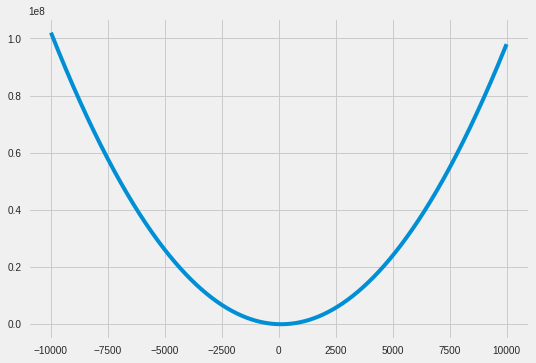

In [13]:
def MSE(actual, pred):
  return np.square(actual - pred)

actual_arr = np.repeat(100, 10000)
pred_arr = np.arange(-10000, 10000, 2)

loss_mSe = [MSE(actual, pred) for actual, pred in zip(actual_arr, pred_arr)]

plt.plot(pred_arr, loss_mSe)
total_loss = np.mean(np.sum(loss_mSe))
total_loss

#### Advantages:

* $ax^{2}$+bx+c = 0 plot quadratic eq, we get a gradient descent with only golbal minima


* We do'nt get any local minima


* this loss function penalizes the model for making large errors by squaring them


#### Disadvantages:

* It is not robust to outliers 


#### Mean Abslolute Error (MAE) |  l1  Loss function | L1-norm Loss Function (Least Absolute Error LAE):


* Mean Absolute Error (also called L1 loss) is one of the most simple yet robust loss functions used for regression models.



* Regression problems may have variables that are not strictly Gaussian in nature due to the presence of outliers (values that are very different from the rest of the data). Mean Absolute Error would be an ideal option in such cases because it does not take into account the direction of the outliers (unrealistically high positive or negative values).



* As the name suggests, MAE takes the average sum of the absolute differences between the actual and the predicted values. For a data point xi and its predicted value yi, n being the total number of data points in the dataset, the mean absolute error is defined as:


$$MAE = \frac{1}{n}\sum_{i}^{n}\left | Y - Y_{i} \right | \rightarrow Linear Equation$$


 
<img src="https://miro.medium.com/max/576/1*8BQhdKu1nk-tAAbOR17qGg.png"/>

                                  
                                  
                                  Plot of MAE Loss (Y-axis) vs. Predictions (X-axis)

50005100.0

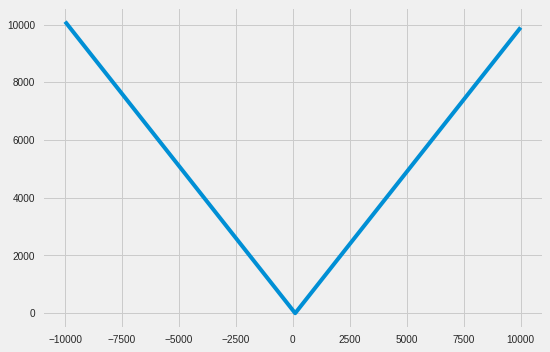

In [14]:
def MAE(actual, pred):
  return np.abs(actual - pred)
actual_arr = np.repeat(100, 10000)
pred_arr = np.arange(-10000, 10000, 2)

loss_mae = [MAE(actual, pred) for actual, pred in zip(actual_arr, pred_arr)]

plt.plot(pred_arr, loss_mae)
total_loss = np.mean(np.sum(loss_mae))
total_loss

#### Advantages:


* The MAE is more robust to outliers as compared to MSE


#### Disadvantages:

* It really computation is very difficult


* It may have local minima


                  ***L1 loss is more robust to outliers, but its derivatives are not continuous, making it inefficient to find the solution. L2 loss is sensitive to outliers, but gives a more stable and closed form solution (by setting its derivative to 0.)***
                  
                  
                  
<img src="https://miro.medium.com/max/700/1*JTC4ReFwSeAt3kvTLq1YoA.png"/>                  

#### Mean Squared Logarithmic Error (MSLE):


* Sometimes, one may not want to penalize the model too much for predicting unscaled quantities directly. Relaxing the penalty on huge differences can be done with the help of Mean Squared Logarithmic Error.



* Calculating the Mean Squared Logarithmic Error is the same as Mean Squared Error, except the natural logarithm of the predicted values is used rather than the actual values.



$$MSLE = \frac{1}{n}\sum_{i=1}^{n}(log(y)-log(Y_{i})^{2}$$



Where 
Y is the true value, $Y_{i}$ is the predicted value and n is the total number of data points in the dataset.



#### Huber loss:


A comparison between L1 and L2 loss yields the following results:

* L1 loss is more robust than its counterpart.



* On taking a closer look at the formulas, one can observe that if the difference between the predicted and the actual value is high, L2 loss magnifies the effect when compared to L1. Since L2 succumbs to outliers, L1 loss function is the more robust loss function.



* L1 loss is less stable than L2 loss.



* Since L1 loss deals with the difference in distances, a small horizontal change can lead to the regression line jumping a large amount. Such an effect taking place across multiple iterations would lead to a significant change in the slope between iterations.

* On the other hand, MSE ensures the regression line moves lightly for a small adjustment in the data point.



* Huber Loss combines the robustness of L1 with the stability of L2, essentially the best of L1 and L2 losses. For huge errors, it is linear and for small errors, it is quadratic in nature.

* Huber Loss is characterized by the parameter delta (𝛿). For a prediction f(x) of the data point y, with the characterizing parameter 𝛿, Huber Loss is formulated as:


$$Huber loss= \begin{cases}
\frac{1}{2}(Y-Y_{i})^2  & \text{ if } |Y-Y_{i}|\leq \delta \rightarrow Quadratic-Equation \\ 
 \delta|Y-Y_{i}|-\frac{1}{2}\delta^2& \text{ otherwise } \rightarrow Linear-Equation
\end{cases}$$


$\delta$ A float point where huber loss changes from quadratic to linear value



<img src="https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_892,h_669/https://www.evergreeninnovations.co/wp-content/uploads/2019/01/loss_functions.png"/>

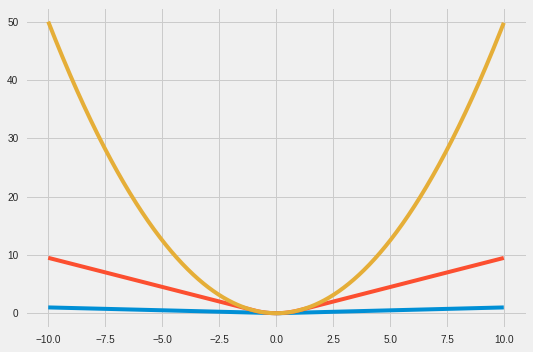

In [29]:
def huber(true, pred, delta):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: smoothed mean absolute error loss
    """
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return loss

actual_arr = np.repeat(0, 1000)
pred_arr = np.arange(-10, 10, 0.02)

deltas = [0.1, 1, 10]

loss_huber = [[huber(actual, pred, delta) for actual, pred in zip(actual_arr, pred_arr)] for delta in deltas]

for idx in range(len(deltas)):
  plt.plot(pred_arr, loss_huber[idx])

#### Why use Huber Loss?

* One big problem with using MAE for training of neural nets is its constantly large gradient, which can lead to missing minima at the end of training using gradient descent. For MSE, gradient decreases as the loss gets close to its minima, making it more precise.




* Huber loss can be really helpful in such cases, as it curves around the minima which decreases the gradient. And it’s more robust to outliers than MSE. Therefore, it combines good properties from both MSE and MAE. However, the problem with Huber loss is that we might need to train hyperparameter delta which is an iterative process.



### Log-Cosh Loss:



* Log-cosh is another function used in regression tasks that’s smoother than L2. Log-cosh is the logarithm of the hyperbolic cosine of the prediction error.



$$L(Y,Y_{p}) = \sum_{i=1}^{n}log(cosh(Y_{p}^{i}-Y_{i}))$$



<img src="https://miro.medium.com/max/504/1*BAbgW_JdwyAWLZR2dE1Ujg.png"/>


                        Plot of Log-cosh Loss (Y-axis) vs. Predictions (X-axis). True value = 0
                        
                        

## Loss functions for classification:


* Classification problems involve predicting a discrete class output. It involves dividing the dataset into different and unique classes based on different parameters so that a new and unseen record can be put into one of the classes.




* A mail can be classified as a spam or not a spam and a person’s dietary preferences can be put in one of three categories - vegetarian, non-vegetarian and vegan. Let’s take a look at loss functions that can be used for classification problems.



### Binary Cross Entropy Loss:


* This is the most common loss function used for classification problems that have two classes. The word “entropy”, seemingly out-of-place, has a statistical interpretation.




* Entropy is the measure of randomness in the information being processed, and cross entropy is a measure of the difference of the randomness between two random variables.




* If the divergence of the predicted probability from the actual label increases, the cross-entropy loss increases. Going by this, predicting a probability of .011 when the actual observation label is 1 would result in a high loss value. In an ideal situation, a “perfect” model would have a log loss of 0. Looking at the loss function would make things even clearer -



$$J= -\sum_{i=1}^{N}Y_{i}log(Y_{i}^{p})+ (1-Y_{i})log(1-Y_{i}{p})$$

where 

 $$cost =  \begin{cases}
-log(Y_{i}^{p}) & \text{ if } Y_{i}= 1\\ 
-log(1-Y_{i}^{p}) & \text{ if } Y_{i}= 0
\end{cases}$$



### Categorical Cross Entropy Loss:


* Categorical Cross Entropy loss is essentially Binary Cross Entropy Loss expanded to multiple classes. One requirement when categorical cross entropy loss function is used is that the labels should be one-hot encoded.



* This way, only one element will be non-zero as other elements in the vector would be multiplied by zero. This property is extended to an activation function called softmax


<img src="https://peltarion.com/static/categorical_crossentropy_setup.svg"/>

$$CCE(Y,Y_{p}) = -\sum_{i=1}^{\mathrm{output \atop size}} y_{t} \cdot \mathrm{log(Y_{p})}\$$



<img src="https://www.machinecurve.com/wp-content/uploads/2019/10/bce.png"/>




### Sparse Categorical Cross Entropy:



* The only difference between sparse categorical cross entropy and categorical cross entropy is the format of true labels. When we have a single-label, multi-class classification problem, the labels are mutually exclusive for each data, meaning each data entry can only belong to one class. Then we can represent y_true using one-hot embeddings.



* Both, categorical cross entropy and sparse categorical cross entropy have the same loss function which you have mentioned above. The only difference is the format in which you mention Yi (i,e true labels).



* If your Yi's are one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]



* But if your Yi's are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]



* The usage entirely depends on how you load your dataset. One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.



### Hinge Loss:



* Another commonly used loss function for classification is the hinge loss. Hinge loss is primarily developed for support vector machines for calculating the maximum margin from the hyperplane to the classes.




* Loss functions penalize wrong predictions and does not do so for the right predictions. So, the score of the target label should be greater than the sum of all the incorrect labels by a margin of (at the least) one.




* This margin is the maximum margin from the hyperplane to the data points, which is why hinge loss is preferred for SVMs. The following image clears the air on what a hyperplane and maximum margin is:


<img src="https://www.section.io/engineering-education/understanding-loss-functions-in-machine-learning/svm.png"/>



                           The mathematical formulation of hinge loss is as follows:
                           
 $$SVM Loss = \sum_{Y\neq Y_{p}}max(0,1 - Y_{t} * Y_{p})$$

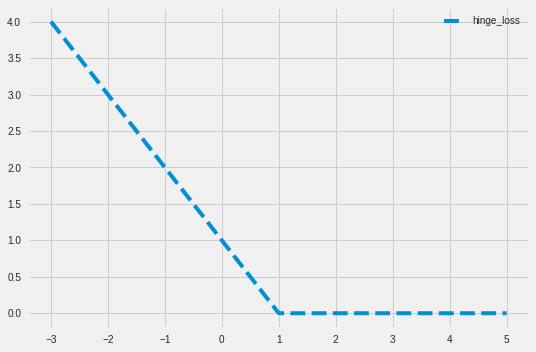

In [31]:
x_guess2 = tf.linspace(-3.,5.,500)
x_actual2 = tf.convert_to_tensor([1.]*500)

hinge_loss = tf.maximum(0.,1.-(x_guess2*x_actual2))
x_,hin_ = [x_guess2, hinge_loss]
plt.plot(x_,hin_,'--', label='hinge_loss')
plt.legend()
plt.show()